In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

In [20]:
df1 = pd.read_excel('Socially Rented Dwellings by LA, 1992-2021.xlsx')
df1.rename(columns={'new_dwellings':'SR'}, inplace=True)
df1.drop(columns='Unnamed: 0',inplace=True)
print(df1.shape)
df1.head()

(12000, 4)


,LA_code,LA,year,SR
0,E07000157,Alnwick,1992,44.0
1,E07000158,Berwick-upon-Tweed,1992,5.0
2,E07000159,Blyth Valley,1992,16.0
3,E07000160,Castle Morpeth,1992,8.0
4,E07000054,Chester-le-Street,1992,0.0


In [21]:
df2 = pd.read_excel('Affordable Rent Dwellings by LA, 1992-2021.xlsx')
df2.drop(columns='Unnamed: 0', inplace=True)
df2.rename(columns={'new_dwellings':'AR'}, inplace=True)
print(df2.shape)
df2.head()

(12000, 4)


,LA_code,LA,year,AR
0,E07000157,Alnwick,1992,45.0
1,E07000158,Berwick-upon-Tweed,1992,5.0
2,E07000159,Blyth Valley,1992,21.0
3,E07000160,Castle Morpeth,1992,8.0
4,E07000054,Chester-le-Street,1992,16.0


In [63]:
df3 = pd.read_excel('Dwellings by LA 1980-2021.xlsx')
df3.drop(columns=['Unnamed: 0','DLUHC Code','Former ONS Code'], inplace=True)
df3 = df3[['ONS Code','Local Authority','DC_Total','year']][df3.loc[:,'year']>=1992]
df3.reset_index(drop=True,inplace=True)
df3.rename(columns={'ONS Code':'LA_code','Local Authority':'LA'},inplace=True)

In [71]:
df = pd.merge(df1,df2,on=['LA_code','LA','year'])
df = pd.merge(df,df3,on=['LA_code','LA','year'])
df.loc[:,'date'] = pd.to_datetime(df.loc[:,'year'].astype(str),format='%Y')
df.loc[df.DC_Total=='..','DC_Total'] = np.nan
df.loc[:,'DC_Total'] = df.loc[:,'DC_Total'].astype(float)

In [72]:
df.head()

,LA_code,LA,year,SR,AR,DC_Total,date
0,E07000157,Alnwick,1992,44.0,45.0,140.0,1992-01-01
1,E07000158,Berwick-upon-Tweed,1992,5.0,5.0,70.0,1992-01-01
2,E07000159,Blyth Valley,1992,16.0,21.0,410.0,1992-01-01
3,E07000160,Castle Morpeth,1992,8.0,8.0,140.0,1992-01-01
4,E07000054,Chester-le-Street,1992,0.0,16.0,340.0,1992-01-01


In [73]:
dcov = df[df.loc[:,'LA']=='Coventry'].copy()
dcov.head()

,LA_code,LA,year,SR,AR,DC_Total,date
109,E08000026,Coventry,1992,102.0,127.0,230.0,1992-01-01
408,E08000026,Coventry,1993,231.0,331.0,390.0,1993-01-01
707,E08000026,Coventry,1994,378.0,474.0,330.0,1994-01-01
1006,E08000026,Coventry,1995,271.0,371.0,490.0,1995-01-01
1305,E08000026,Coventry,1996,203.0,315.0,530.0,1996-01-01


In [84]:
dcov.reset_index(drop=True,inplace=True)

C:\Users\adnaa\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


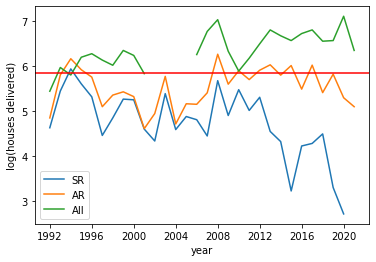

In [79]:
x = dcov['date']
y1 = np.log(dcov['SR'])
y2 = np.log(dcov['AR'])
y3 = np.log(dcov['DC_Total'])
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.axhline(y=np.log(348),color='r')
plt.xlabel('year')
plt.ylabel('log(houses delivered)')
plt.legend(['SR','AR','All'])

In [98]:
dt = df[['LA_code','LA','SR','AR','DC_Total','date']].groupby(['date']).sum()

In [54]:
x = dt.index
y1 = dt['SR']
y2 = dt['AR']
y3 = dcov['SR']
y4 = dcov['AR']

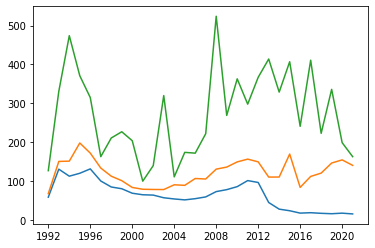

In [57]:
plt.plot(x,y1)
plt.plot(x,y2)
#plt.plot(x,y3)
plt.plot(x,y4)

Coventry is above the mean for affordable house delivery, but does not follow the recent trend of increasing affordable homes delivery.

In [96]:
dt

,SR,AR,DC_Total
date,,,
1992-01-01,66.755853,77.066890,411.839465
1993-01-01,156.170569,180.394649,389.698997
1994-01-01,133.856187,173.585284,401.137124
1995-01-01,139.016722,182.217391,427.357860
1996-01-01,153.489933,201.201342,417.852349
1997-01-01,117.225166,156.539735,390.529801
1998-01-01,96.708609,128.675497,389.867550
1999-01-01,92.316832,117.184818,364.229391
2000-01-01,77.864686,95.488449,371.715976


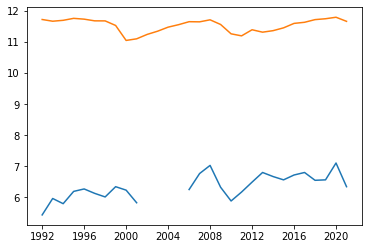

In [99]:
x = dt.index
y1 = np.log(dcov['DC_Total'])
y2 = np.log(dt['DC_Total'])

plt.plot(x,y1)
plt.plot(x,y2)

In [124]:
df4 = pd.read_excel('Median House Prices by LA 1995-2021, Quarterly, Long.xlsx')


In [125]:
df4['quarter'] = df4['quarter'].map(lambda x: ''.join(x.split()))

In [126]:
df4 = df4.loc[df4.quarter!='...109',:]

In [129]:
df4['date'] = pd.to_datetime(df4['quarter'],format='%b%Y')

In [135]:
dcov4 = df4[df4.loc[:,'LA']=='Coventry'].copy()
dcov4.reset_index(drop=True,inplace=True)
dcov4['year'] = dcov4['date'].dt.year

In [138]:
for x in dcov4.index[1:]:
    dcov4.loc[x,'price_change'] = dcov4.loc[x,'median'] - dcov4.loc[x-1,'median']

In [139]:
dcov4.head()

,LA_code,LA,quarter,median,date,year,price_change
0,E08000026,Coventry,Dec1995,42000.0,1995-12-01,1995,NaN
1,E08000026,Coventry,Mar1996,41500.0,1996-03-01,1996,-500.0
2,E08000026,Coventry,Jun1996,41500.0,1996-06-01,1996,0.0
3,E08000026,Coventry,Sep1996,42000.0,1996-09-01,1996,500.0
4,E08000026,Coventry,Dec1996,42000.0,1996-12-01,1996,0.0


C:\Users\adnaa\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


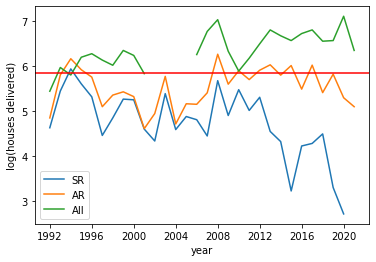

In [144]:
x = dcov['date']
y1 = np.log(dcov['SR'])
y2 = np.log(dcov['AR'])
y3 = np.log(dcov['DC_Total'])
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.axhline(y=np.log(348),color='r')
plt.xlabel('year')
plt.ylabel('log(houses delivered)')
plt.legend(['SR','AR','All'])

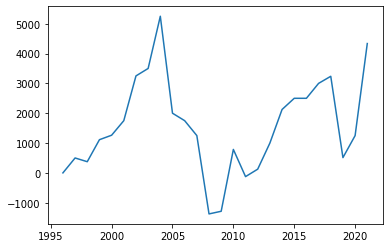

In [145]:
a = dcov4.groupby('year').mean().index
b = dcov4.groupby('year').mean().price_change
plt.plot(a,b)